In [11]:

!pip install fastbook
import fastbook
from fastbook import *
from duckduckgo_search import DDGS
from fastcore.all import *
import os

In [12]:
!pip install duckduckgo_search

In [13]:
from duckduckgo_search import DDGS

In [14]:
 # Define the path to the main folder containing "horse or human"
path = Path("E:\Applications\Anaconda\envs\nvidia_env\Projects\Data\horse-or-human\horse-or-human")   

In [15]:
# Function to search for images
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=term)
        image_urls = [next(search_results).get("image") for _ in range(max_images)]
        return L(image_urls)


In [16]:
# Define search terms
searches = 'horse', 'human'

In [18]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=term)
        image_urls = []
        
        # Collect image URLs up to max_images
        for _ in range(max_images):
            try:
                result = next(search_results)  # Get the next result
                image_urls.append(result.get("image"))  # Append the image URL
            except StopIteration:
                break  # Stop if there are no more results
        
        return L(image_urls)

In [20]:
# Resize images in the training folder
resize_images(path / 'train' / o, max_size=400, dest=path / 'train' / o)

In [21]:
# Verify images and remove any failed downloads
failed = verify_images(get_image_files(path / 'train'))
failed.map(Path.unlink)
print(f"Number of failed images: {len(failed)}")

Number of failed images: 0


In [22]:
# Create DataLoaders for training and validation
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='validation'),
    get_y=using_attr(RegexLabeller(r'(.+?)/(.+)'), 'name'),
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

TypeError: 'NoneType' object is not iterable

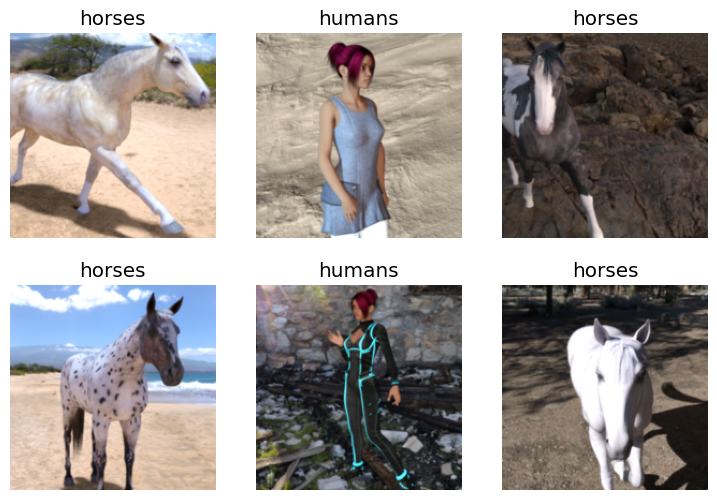

In [62]:
from fastai.vision.all import *

# Define the path to the dataset
path = Path('/kaggle/input/horses-or-humans-dataset/horse-or-human')  # Replace 'your-dataset' with the actual dataset name

# Create DataLoaders for training and validation
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='validation'),
    get_y=parent_label,  # Use built-in parent_label to extract labels
    item_tfms=[Resize(192)]
).dataloaders(path, bs=32)  # Use the main directory path

# Show a batch of images
dls.show_batch(max_n=6)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 147MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.143829,0.000252,1.000000,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.008332,0.006964,1.000000,00:11
1,0.015277,0.110825,0.976562,00:10
2,0.008683,0.088223,0.976562,00:10
3,0.007358,0.079705,0.980469,00:11


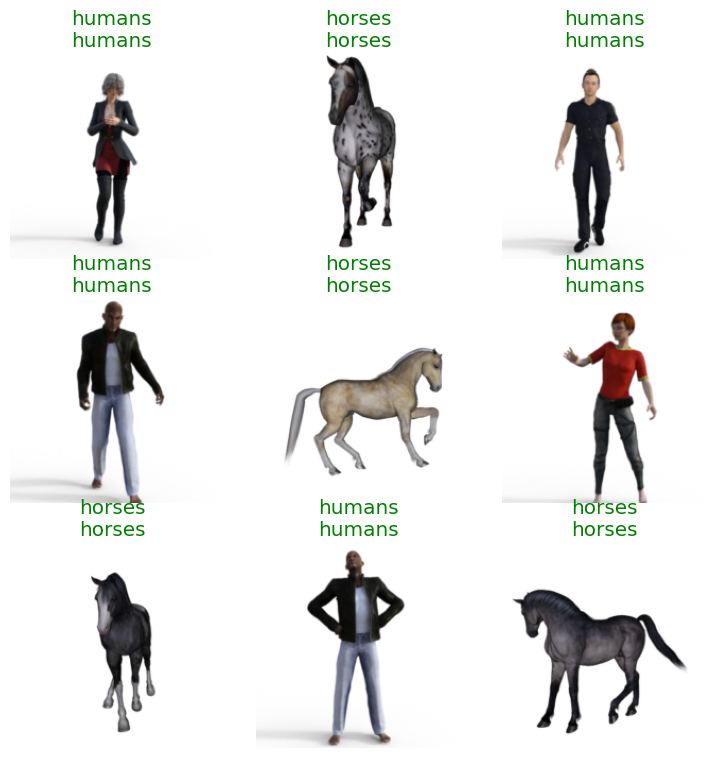

In [63]:
# Import necessary libraries
from fastai.vision.all import *

# Define the architecture of the model
# You can use a pretrained model like ResNet34
learn = cnn_learner(dls, resnet34, metrics=accuracy)

# Train the model
learn.fine_tune(4)  # You can adjust the number of epochs as needed

# Evaluate the model
learn.show_results()

# Save the model
learn.export('/kaggle/working/horse_or_human_model.pkl')